In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train_road',
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4135 files belonging to 2 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid_road',
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 931 files belonging to 2 classes.


In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
#cnn.add(tf.keras.layers.BatchNormalization())   #extraaaa
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))



cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


cnn.add(tf.keras.layers.Dropout(0.25))


cnn.add(tf.keras.layers.Flatten())


cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))


cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting


#Output Layer
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [6]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                    

In [8]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
130/130 [==============================] - 35s 205ms/step - loss: 0.3376 - accuracy: 0.8612 - val_loss: 0.3530 - val_accuracy: 0.8550
Epoch 2/10
130/130 [==============================] - 24s 181ms/step - loss: 0.1300 - accuracy: 0.9528 - val_loss: 0.0852 - val_accuracy: 0.9710
Epoch 3/10
130/130 [==============================] - 24s 181ms/step - loss: 0.1135 - accuracy: 0.9620 - val_loss: 0.1784 - val_accuracy: 0.9302
Epoch 4/10
130/130 [==============================] - 24s 181ms/step - loss: 0.1039 - accuracy: 0.9676 - val_loss: 0.1637 - val_accuracy: 0.9409
Epoch 5/10
130/130 [==============================] - 24s 181ms/step - loss: 0.0893 - accuracy: 0.9686 - val_loss: 0.0770 - val_accuracy: 0.9839
Epoch 6/10
130/130 [==============================] - 24s 181ms/step - loss: 0.0679 - accuracy: 0.9768 - val_loss: 0.0749 - val_accuracy: 0.9817
Epoch 7/10
130/130 [==============================] - 24s 181ms/step - loss: 0.0553 - accuracy: 0.9816 - val_loss: 0.0615 - val_ac

In [9]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

130/130 [==============================] - 8s 63ms/step - loss: 0.0286 - accuracy: 0.9920
Training accuracy: 0.9920193552970886


In [10]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

30/30 [==============================] - 2s 60ms/step - loss: 0.0573 - accuracy: 0.9828
Validation accuracy: 0.9828141927719116


In [11]:
cnn.save('road_pothole_Rainy_days.keras')

In [12]:
training_history.history #Return Dictionary of history

{'loss': [0.33755746483802795,
  0.12998348474502563,
  0.11350983381271362,
  0.10394807159900665,
  0.08926957100629807,
  0.06790751218795776,
  0.05527498200535774,
  0.04438699781894684,
  0.03736785054206848,
  0.03353586047887802],
 'accuracy': [0.8611850142478943,
  0.952841579914093,
  0.9620314240455627,
  0.9675937294960022,
  0.968561053276062,
  0.9767835736274719,
  0.9816203117370605,
  0.9876662492752075,
  0.9874244332313538,
  0.9908101558685303],
 'val_loss': [0.3529570698738098,
  0.0852331593632698,
  0.17840813100337982,
  0.16368037462234497,
  0.0770295187830925,
  0.07492931932210922,
  0.061462558805942535,
  0.04888009652495384,
  0.07399686425924301,
  0.057293277233839035],
 'val_accuracy': [0.8549946546554565,
  0.9709989428520203,
  0.9301825761795044,
  0.9409237504005432,
  0.9838882684707642,
  0.9817400574684143,
  0.9838882684707642,
  0.989258885383606,
  0.9720730185508728,
  0.9828141927719116]}

In [13]:
#Recording History in json
import json
with open('road_pothole_Rainy_days.json','w') as f:
  json.dump(training_history.history,f)

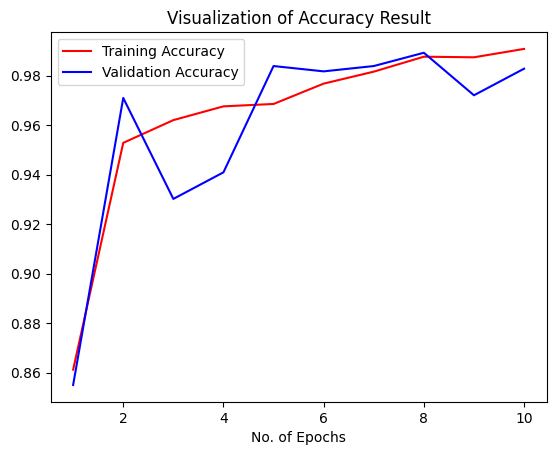

In [14]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [15]:
class_name = validation_set.class_names

In [16]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'test_road',
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5528 files belonging to 2 classes.


In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_pred = cnn.predict(test_set)
predicted_categories = (y_pred > 0.3).astype("int32")


5528/5528 [==============================] - 15s 3ms/step


In [18]:
true_categories = tf.concat([y for x, y in test_set], axis=0)


In [19]:
cm = confusion_matrix(true_categories, predicted_categories)
print(classification_report(true_categories, predicted_categories, target_names=["Good Road", "Pothole Road"]))

              precision    recall  f1-score   support

   Good Road       0.92      0.99      0.96      2034
Pothole Road       1.00      0.95      0.97      3494

    accuracy                           0.97      5528
   macro avg       0.96      0.97      0.97      5528
weighted avg       0.97      0.97      0.97      5528



1/1 [==============================] - 0s 10ms/step


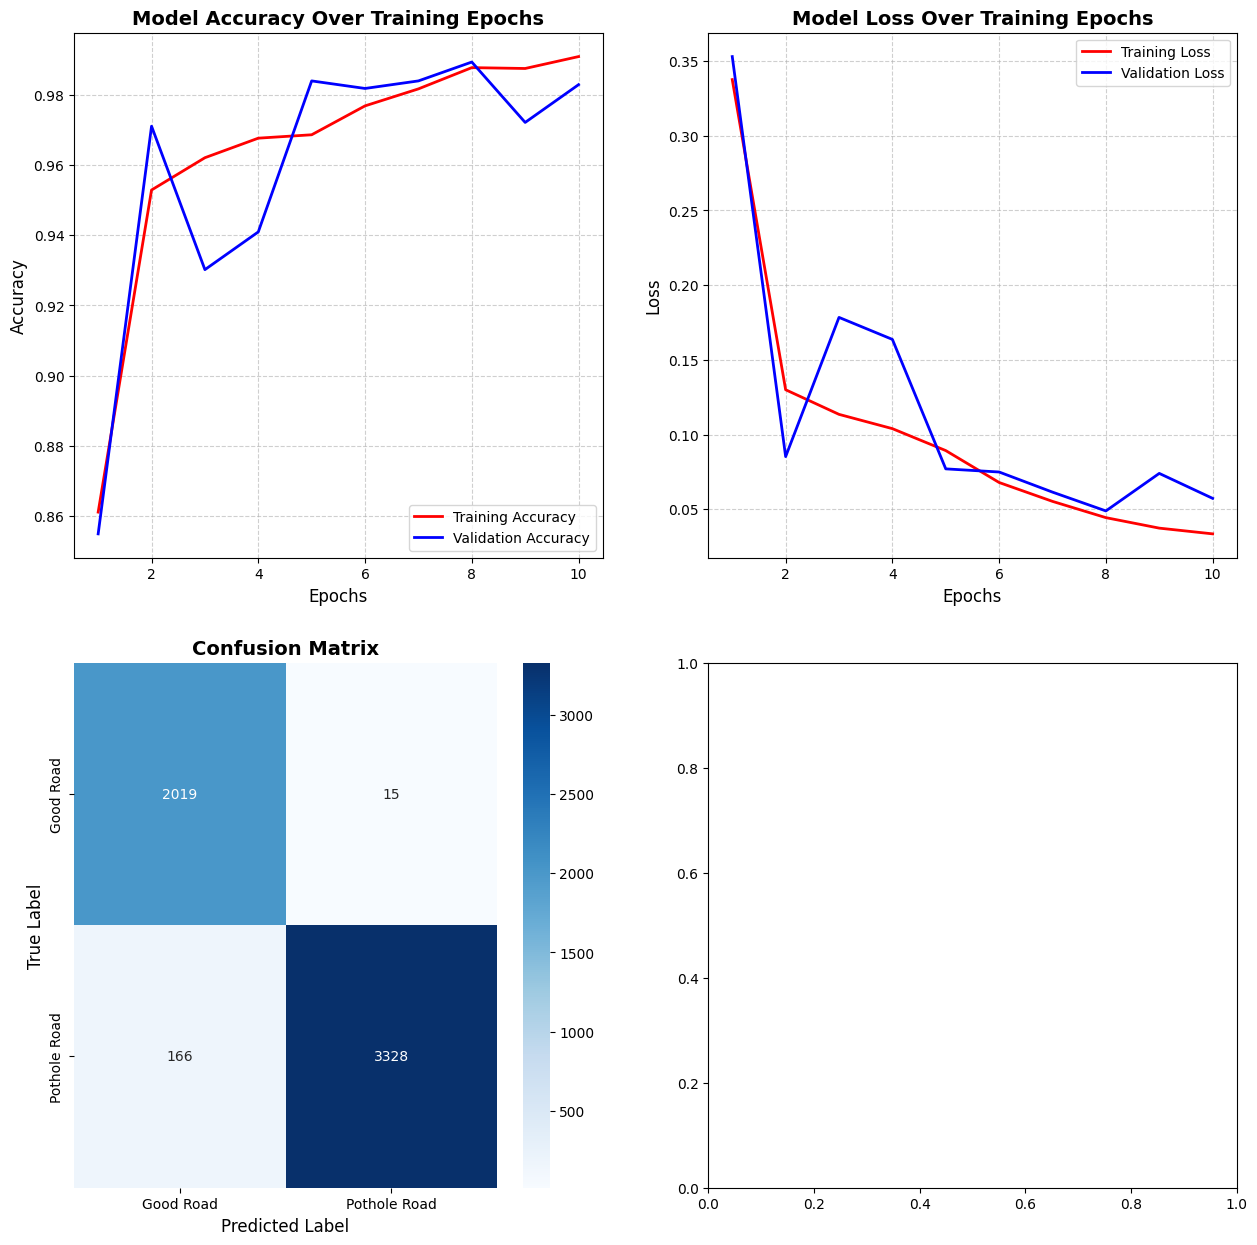

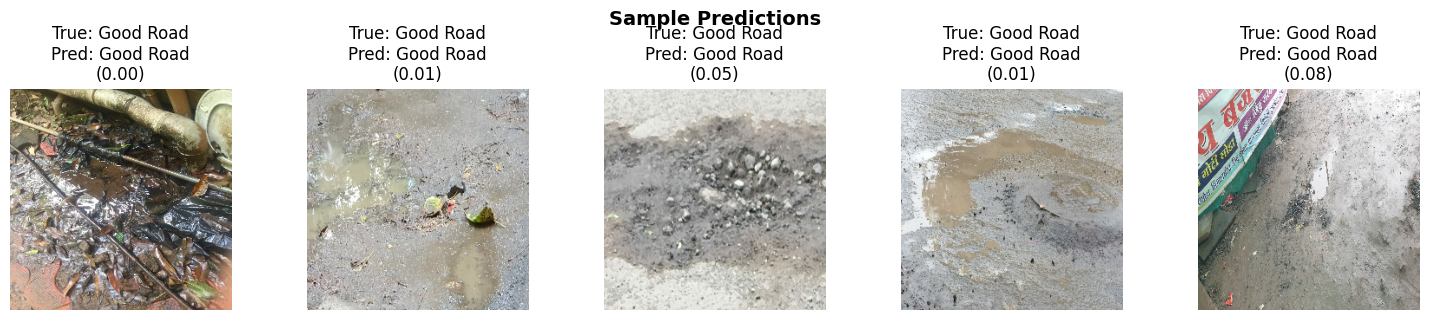

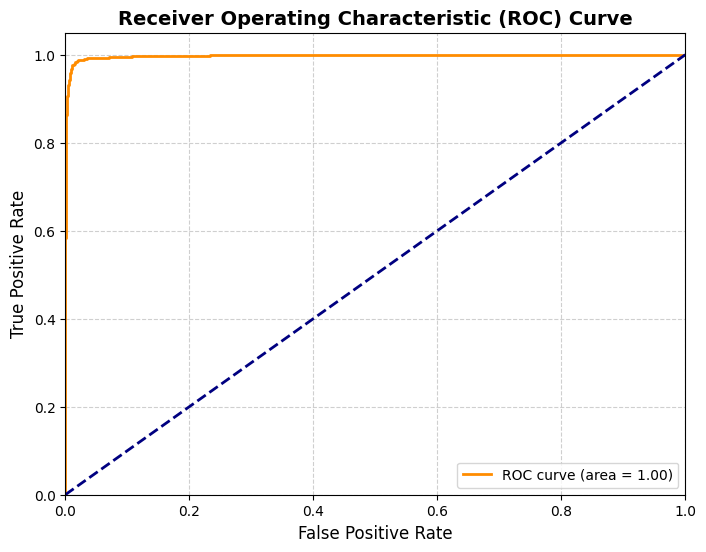

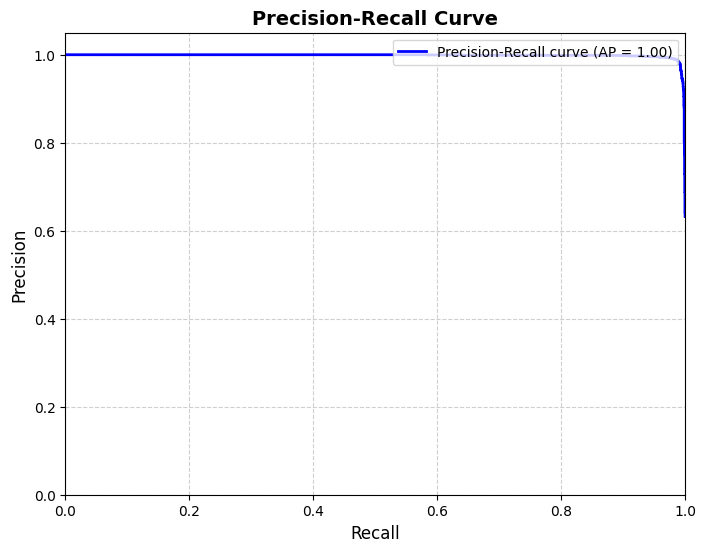

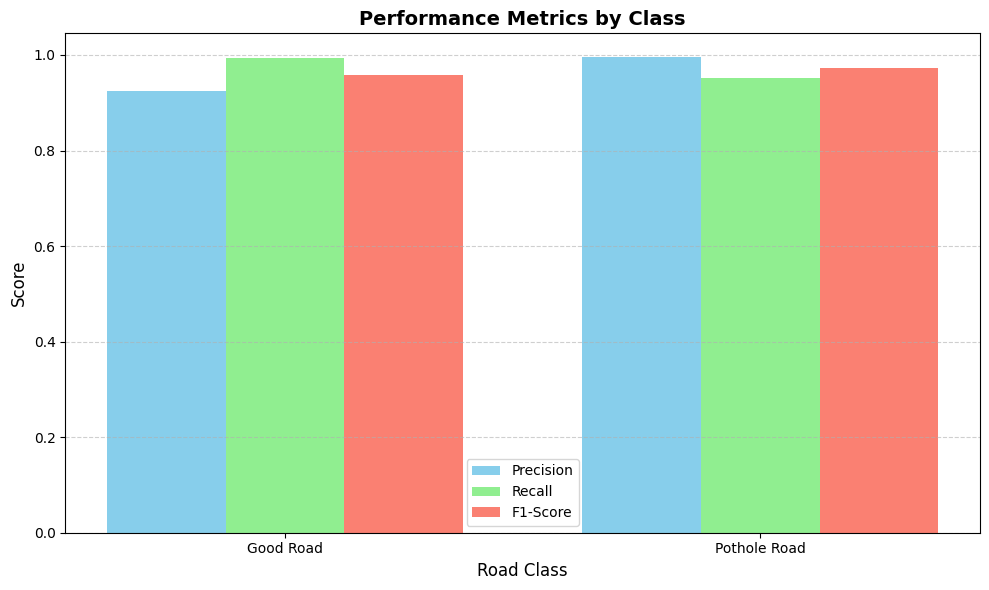

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [20]:
# Create a figure with multiple subplots for better visualization
plt.figure(figsize=(15, 15))

# Plot 1: Training and Validation Accuracy
plt.subplot(2, 2, 1)
plt.plot(epochs, training_history.history['accuracy'], 'r-', linewidth=2, label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], 'b-', linewidth=2, label='Validation Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy Over Training Epochs', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')

# Plot 2: Training and Validation Loss
plt.subplot(2, 2, 2)
plt.plot(epochs, training_history.history['loss'], 'r-', linewidth=2, label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], 'b-', linewidth=2, label='Validation Loss')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Model Loss Over Training Epochs', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')

# Plot 3: Visualize Confusion Matrix as a heatmap
plt.subplot(2, 2, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=["Good Road", "Pothole Road"], 
            yticklabels=["Good Road", "Pothole Road"])
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')

# Plot 4: Display sample predictions
plt.subplot(2, 2, 4)

# Get sample images and predictions from test set
sample_images = []
sample_labels = []
sample_preds = []
count = 0

# Collect a few sample images and their predictions
for images, labels in test_set.take(5):
    sample_images.append(images[0].numpy())
    sample_labels.append(labels[0].numpy())
    pred = cnn.predict(images)[0][0]
    sample_preds.append(pred)
    count += 1
    if count >= 5:
        break

# Plot sample images with predictions
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(sample_images[i].astype("uint8"))
    pred_label = "Pothole" if sample_preds[i] > 0.3 else "Good Road"
    true_label = "Pothole" if sample_labels[i] > 0.5 else "Good Road"
    axes[i].set_title(f"True: {true_label}\nPred: {pred_label}\n({sample_preds[i]:.2f})")
    axes[i].axis('off')
plt.tight_layout()
plt.suptitle("Sample Predictions", fontsize=14, fontweight='bold', y=1.05)
plt.show()

# Create ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(true_categories, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Create precision-recall curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(true_categories, y_pred)
average_precision = average_precision_score(true_categories, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, 
         label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.legend(loc="upper right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Create a bar chart to show class-wise metrics
report = classification_report(true_categories, predicted_categories, 
                              target_names=["Good Road", "Pothole Road"], 
                              output_dict=True)

# Extract metrics
class_names = list(report.keys())[:-3]  # Skip avg and accuracy entries
precision_values = [report[i]['precision'] for i in class_names]
recall_values = [report[i]['recall'] for i in class_names]
f1_values = [report[i]['f1-score'] for i in class_names]

# Create bar chart
x = np.arange(len(class_names))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, precision_values, width, label='Precision', color='skyblue')
plt.bar(x, recall_values, width, label='Recall', color='lightgreen')
plt.bar(x + width, f1_values, width, label='F1-Score', color='salmon')

plt.xlabel('Road Class', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Performance Metrics by Class', fontsize=14, fontweight='bold')
plt.xticks(x, class_names)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Visualize model architecture
from tensorflow.keras.utils import plot_model
plot_model(cnn, to_file='model_architecture.png', show_shapes=True, show_layer_names=True, 
           rankdir='TB', expand_nested=True, dpi=96)